# Bank Marketing Campaign

by :
- Jeffry 
- Hani
- Faris

# Business Problem
- Database Bank marketing campaigns : Data yang menggambarkan hasil kampanye pemasaran Bank Portugal. Kampanye yang dilakukan sebagian besar didasarkan pada panggilan telepon langsung, menawarkan klien bank untuk menempatkan deposito. Namun banyaknya nasabah yang menolak membuka rekening deposito membuat perusahaan harus membuat strategi untuk menambah nasabah membuka deposito.


# Business Goal
- Kami selaku konsultan data science akan memberikan rekomendasi strategi kepada Bank portugal untuk menambah nasabah membuka deposito.

# Data Understanding
- Age   	: Menyimpan informasi tentang umur klien
- Job   	: Menyimpan informasi tentang bidang pekerjaan klien
- Marital 	: Menyimpan informasi tentang status pernikahan klien
- Education 	: Menyimpan informasi tentang status pendidikan klien
- Default 	: Menyimpan informasi tentang latar belakang kredit macet klien
- Campaign	: Informasi terkait jumlah kontak yang dilakukan selama campaign ini
- Housing 	: Menyimpan informasi tentang cicilan rumah klien
- Loan 	: Menyimpan informasi tentang kepemilikan hutang klien terhadap pihak lain
- Contact 	: Menyimpan informasi tentang tipe menghubungi klien melalui telepon dan cellular
- Month 	: Menyimpan informasi tentang bulan menghubungi klien
- Day_of_Week : Menyimpan informasi tentang hari terakhir menghubungi klien
- Duration 	: Menyimpan informasi tentang durasi menghubungi klien melalui telepon dan cellular (dalam hitungan detik)
- Pdays : Menyimpan informasi tentang jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya
- Previous : Menyimpan informasi tentang jumlah komunikasi dengan klien yang dilakukan yang dilakukan sebelum kampanye ini dan untuk klien ini
- Poutcome: Menyimpan informasi tentang hasil dari kampanye pemasaran sebelumnya
- Emp.Var.Rate : Menyimpan informasi tentang variasi tingkat lapangan kerja regional di suatu negara
- Cons.Price.Idx : Menyimpan informasi tentang tingkat inflasi di portugal
- Cons.Conf.Id : Menyimpan informasi tentang kepercayaan klien terhadap bank
- Euriborn3m : Menyimpan informasi tentang tingkat bunga rata-rata Europa
- Nr.employeed : Menyimpan informasi tentang jumlah karyawan bank
- Y : Menyimpan informasi tentang data klien yang jadi melakukan deposit di bank


# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [4]:
# Import dataset
df = pd.read_excel('bank-additional-full.xlsx')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Wrangling

In [5]:
# Function age_range
def umur(x):
    if x > 17 and x <39:
        return '17-25'
    elif x > 25 and x <=39 :
        return '25-39'
    elif x > 39 and x <=59 :
        return '39-59'
    else :
        return '>59'

In [6]:
# Insert Kolom age_year
df.insert(1, column='age_range',value=df['age'].apply(umur))

In [7]:
# Function edu
def edu(x):
    if x == 'basic.4y' :
        return 'basic'
    elif x == 'basic.6y' :
        return 'basic'
    elif x == 'basic.9y' :
        return 'basic'
    else :
        return x

In [8]:
# Insert Kolom edu
df.insert(5, column='edu',value=df['education'].apply(edu))

In [9]:
# Function campaign_range
def campaign_range(x):
    if x <= 10 :
        return '1-10'
    elif x > 10 and x <=20 :
        return '11-20'
    elif x > 20 and x <=30 :
        return '21-30'
    elif x > 30 and x <=40 :
        return '31-40'
    else :
        return '> 40'

In [10]:
# Insert Kolom campaign_range
df.insert(14, column='campaign_range',value=df['campaign'].apply(campaign_range))

In [11]:
df['cons.price.idx'] = df['cons.price.idx'].astype('int64')

In [12]:
df[['cons.price.idx']].value_counts()

cons.price.idx
93                26414
92                 8992
94                 5782
dtype: int64

In [13]:
# Function filter data 2009
def tahun(x):
    if x == 92 :
        return '2009'
    elif x == 93 :
        return '2009'
    elif x == 94 :
        return '2010'
    else :
        return 'unknown'

In [14]:
# Insert Column Year
df.insert(11, column='year',value=df['cons.price.idx'].apply(tahun))

In [15]:
# Drop baris yang bukan tahun 2009
df=df.drop(df[df['year']!='2009'].index)
df

,age,age_range,job,marital,education,edu,default,housing,loan,contact,...,campaign_range,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,39-59,housemaid,married,basic.4y,basic,no,no,no,telephone,...,1-10,999,0,nonexistent,1.1,93,-36.4,4.857,5191.0,no
1,57,39-59,services,married,high.school,high.school,unknown,no,no,telephone,...,1-10,999,0,nonexistent,1.1,93,-36.4,4.857,5191.0,no
2,37,17-25,services,married,high.school,high.school,no,yes,no,telephone,...,1-10,999,0,nonexistent,1.1,93,-36.4,4.857,5191.0,no
3,40,39-59,admin.,married,basic.6y,basic,no,no,no,telephone,...,1-10,999,0,nonexistent,1.1,93,-36.4,4.857,5191.0,no
4,56,39-59,services,married,high.school,high.school,no,no,yes,telephone,...,1-10,999,0,nonexistent,1.1,93,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39775,47,39-59,admin.,single,university.degree,university.degree,no,yes,yes,cellular,...,1-10,999,0,nonexistent,-1.8,93,-40.0,0.701,5008.7,no
39776,31,17-25,unknown,single,high.school,high.school,no,no,no,cellular,...,1-10,999,0,nonexistent,-1.8,93,-40.0,0.701,5008.7,yes
39777,31,17-25,unknown,single,high.school,high.school,no,no,no,cellular,...,1-10,6,2,success,-1.8,93,-40.0,0.701,5008.7,no
39778,49,39-59,technician,single,university.degree,university.degree,no,no,no,telephone,...,1-10,999,0,nonexistent,-1.8,93,-40.0,0.701,5008.7,no


In [16]:
# Drop kolom yang tidak terpakai
df = df.drop(columns=['default','day_of_week','duration','pdays','emp.var.rate','nr.employed','euribor3m'])


In [17]:
# Function filter column marital
def fill_marital(x):
    if x == 'unknown' :
        return 'married'
    else:
        return x

In [18]:
# Filter missing value column marital
df['marital'] = df['marital'].apply(fill_marital)

In [19]:
# Function filter column Job
def fill_job(x):
    if x == 'unknown' :
        return 'admin.'
    else:
        return x

In [20]:
# Filter missing value column job
df['job'] = df['job'].apply(fill_job)

In [21]:
# Function filter column Education
def fill_education(x):
    if x == 'unknown' :
        return 'university.degree'
    else:
        return x

In [22]:
# Filter missing value column education
df['edu'] = df['edu'].apply(fill_education)

In [23]:
# Melakukan Fill missing value pada kolom housing
def fill_housing(x):
    if x == 'unknown' :
        return 'yes'
    else:
        return x

In [24]:
# Filter missing value column housing
df['housing'] = df['housing'].apply(fill_housing)

In [25]:
# Melakukan Fill missing value pada kolom loan
def fill_loan(x):
    if x == 'unknown' :
        return 'no'
    else:
        return x

In [26]:
# Filter missing value column loan
df['loan'] = df['loan'].apply(fill_loan)

# **EDA**

In [27]:
df

,age,age_range,job,marital,education,edu,housing,loan,contact,month,year,campaign,campaign_range,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,39-59,housemaid,married,basic.4y,basic,no,no,telephone,may,2009,1,1-10,0,nonexistent,93,-36.4,no
1,57,39-59,services,married,high.school,high.school,no,no,telephone,may,2009,1,1-10,0,nonexistent,93,-36.4,no
2,37,17-25,services,married,high.school,high.school,yes,no,telephone,may,2009,1,1-10,0,nonexistent,93,-36.4,no
3,40,39-59,admin.,married,basic.6y,basic,no,no,telephone,may,2009,1,1-10,0,nonexistent,93,-36.4,no
4,56,39-59,services,married,high.school,high.school,no,yes,telephone,may,2009,1,1-10,0,nonexistent,93,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39775,47,39-59,admin.,single,university.degree,university.degree,yes,yes,cellular,may,2009,1,1-10,0,nonexistent,93,-40.0,no
39776,31,17-25,admin.,single,high.school,high.school,no,no,cellular,may,2009,1,1-10,0,nonexistent,93,-40.0,yes
39777,31,17-25,admin.,single,high.school,high.school,no,no,cellular,may,2009,5,1-10,2,success,93,-40.0,no
39778,49,39-59,technician,single,university.degree,university.degree,no,no,telephone,may,2009,1,1-10,0,nonexistent,93,-40.0,no


## BUSINESS QUESTION 1 
Apakah ketika nasabah sering dihubungi jadi lebih tertarik untuk melakukan deposit atau tidak?

In [28]:
# Hasil tabular
pd.crosstab(index=df['campaign_range'], columns=df['y'], margins=True)

y,no,yes,All
campaign_range,,,
1-10,31040,3725,34765
11-20,520,22,542
21-30,75,1,76
31-40,18,0,18
> 40,5,0,5
All,31658,3748,35406


In [29]:
crosstb1 = (pd.crosstab(index=df['campaign_range'], columns=df['y'],normalize='index')).round(2)
crosstb1


y,no,yes
campaign_range,,
1-10,0.89,0.11
11-20,0.96,0.04
21-30,0.99,0.01
31-40,1.00,0.00
> 40,1.00,0.00


<Figure size 10000x4000 with 0 Axes>

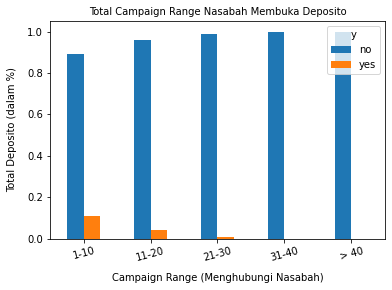

In [30]:
plt.figure(figsize=(50,20),dpi=200)
barplot1 = crosstb1.plot.bar(rot=0)
plt.title("Total Campaign Range Nasabah Membuka Deposito",size=10)
plt.xlabel('Campaign Range (Menghubungi Nasabah)', size=10, labelpad=10)
plt.ylabel('Total Deposito (dalam %)', size=10, labelpad=10)
plt.xticks(size=10,rotation=15)
plt.yticks(size=10)
plt.savefig('Visualisasi Business Question 1.jpeg')
plt.show(barplot1)

## BUSINESS QUESTION 2 
Manakah yang lebih efektif saat menelefon nasabah, menggunakan celullar atau telephone?


In [31]:
pd.crosstab(index=df['contact'], columns=df['y'])

y,no,yes
contact,,
cellular,21813,3207
telephone,9845,541


In [32]:
# Hasil Tabular
crostab2 = (pd.crosstab(index=df['contact'], columns=df['y'], normalize='index')).round(2)
crostab2

y,no,yes
contact,,
cellular,0.87,0.13
telephone,0.95,0.05


<Figure size 3750x1500 with 0 Axes>

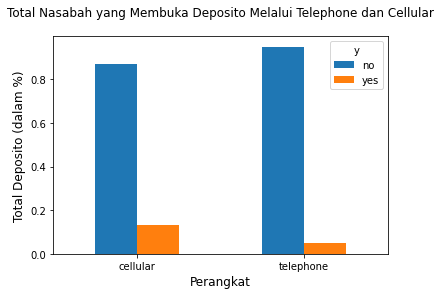

In [33]:
plt.figure(figsize=(25,10),dpi=150)
barplot2 = crostab2.plot.bar(rot=0)
plt.title("Total Nasabah yang Membuka Deposito Melalui Telephone dan Cellular",size=12,pad=20)
plt.xlabel("Perangkat",size=12)
plt.ylabel("Total Deposito (dalam %)",size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.savefig('Visualisasi Business Question 2.jpeg')
plt.show()

## BUSINESS QUESTION 3
Bulan apa yang tepat untuk melakukan campaign?

In [34]:
# Hasil Tabular
pd.crosstab(index=df['month'], columns=df['y'], margins=True)


y,no,yes,All
month,,,
apr,2093,539,2632
aug,5410,535,5945
dec,93,89,182
jul,6390,473,6863
jun,451,264,715
mar,270,276,546
may,12883,886,13769
nov,3615,358,3973
oct,292,222,514


In [35]:
crosstab3 = (pd.crosstab(index=df['month'], columns=df['y'], normalize='index')).round(2)
crosstab3

y,no,yes
month,,
apr,0.80,0.20
aug,0.91,0.09
dec,0.51,0.49
jul,0.93,0.07
jun,0.63,0.37
mar,0.49,0.51
may,0.94,0.06
nov,0.91,0.09
oct,0.57,0.43


<Figure size 3750x1500 with 0 Axes>

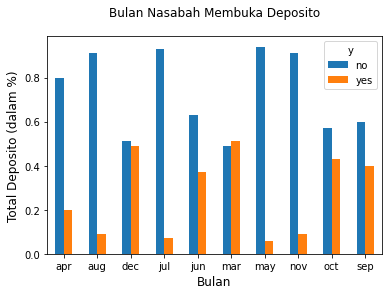

In [36]:
plt.figure(figsize=(25,10),dpi=150)
barplot3 = crosstab3.plot.bar(rot=0)
plt.title("Bulan Nasabah Membuka Deposito",size=12,pad=20)
plt.xlabel("Bulan",size=12)
plt.ylabel("Total Deposito (dalam %)",size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.savefig('Visualisasi Business Question 3.jpeg')
plt.show()

## BUSINESS QUESTION 4 
Apakah umur dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [37]:
# Hasil tabular
crosstb4 = pd.crosstab(index=df['age_range'], columns=df['y'],normalize='index').round(2).sort_values(by=['age_range'],ascending=True)
crosstb4

y,no,yes
age_range,,
17-25,0.89,0.11
25-39,0.92,0.08
39-59,0.91,0.09
>59,0.63,0.37


<Figure size 3000x1500 with 0 Axes>

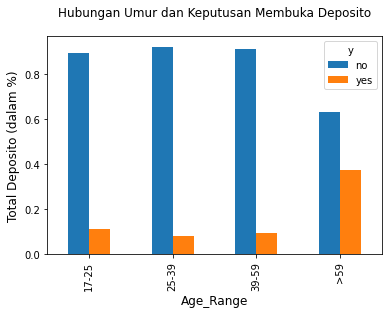

In [38]:
plt.figure(figsize=(20,10),dpi=150)
barplot4 = crosstb4.plot.bar(rot=1)
plt.title("Hubungan Umur dan Keputusan Membuka Deposito",size=12,pad=20)
plt.xlabel("Age_Range",size=12)
plt.ylabel('Total Deposito (dalam %)',size=12)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.savefig('Visualisasi Business Question 4.jpeg')
plt.show()


## BUSINESS QUESTION 5
Apakah status pernikahan dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [39]:
# Hasil tabular
pd.crosstab(index=df['marital'], columns=df['y'])

y,no,yes
marital,,
divorced,3581,381
married,19360,2068
single,8717,1299


In [40]:
crosstb5 = (pd.crosstab(index=df['marital'], columns=df['y'],normalize='index')).round(2)
crosstb5

y,no,yes
marital,,
divorced,0.90,0.10
married,0.90,0.10
single,0.87,0.13


<Figure size 3000x1500 with 0 Axes>

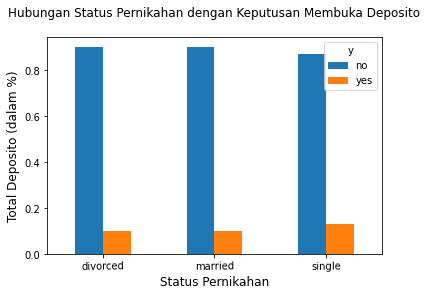

In [41]:
plt.figure(figsize=(20,10),dpi=150)
barplot5 = crosstb5.plot.bar(rot=1)
plt.title("Hubungan Status Pernikahan dengan Keputusan Membuka Deposito",size=12,pad=20)
plt.xlabel("Status Pernikahan",size=12)
plt.ylabel('Total Deposito (dalam %)',size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.savefig('Visualisasi Business Question 5.jpeg')
plt.show()

## BUSINESS QUESTION 6
Apakah jenjang pendidikan dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [42]:
# Hasil Tabular
pd.crosstab(index=df['edu'], columns=df['y'], margins=True).sort_values('yes', ascending=False)

y,no,yes,All
edu,,,
All,31658,3748,35406
university.degree,10556,1549,12105
basic,9718,899,10617
high.school,7308,832,8140
professional.course,4062,464,4526
illiterate,14,4,18


In [43]:
crosstb6 = (pd.crosstab(index=df['edu'], columns=df['y'], normalize=True)).round(2)
crosstb6

y,no,yes
edu,,
basic,0.27,0.03
high.school,0.21,0.02
illiterate,0.00,0.00
professional.course,0.11,0.01
university.degree,0.30,0.04


<Figure size 3000x1500 with 0 Axes>

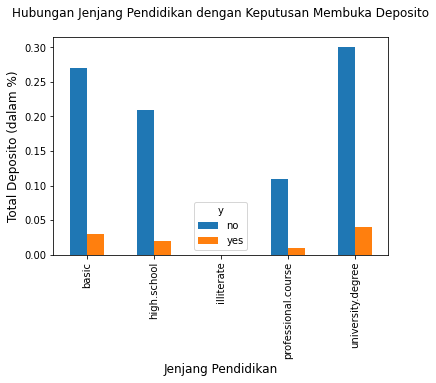

In [44]:

plt.figure(figsize=(20,10),dpi=150)
barplot6 = crosstb6.plot.bar(rot=1)
plt.title("Hubungan Jenjang Pendidikan dengan Keputusan Membuka Deposito",size=12,pad=20)
plt.xlabel("Jenjang Pendidikan",size=12)
plt.ylabel('Total Deposito (dalam %)',size=12)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.savefig('Visualisasi Business Question 6.jpeg')
plt.show()

## BUSINESS QUESTION 7
Apakah keberhasilan campaign sebelumnya dapat mempengaruhi nasabah dalam mengambil keputusan deposito?

In [45]:
# Hasil Tabular
pd.crosstab(index=df['poutcome'], columns='Jumlah')

col_0,Jumlah
poutcome,
failure,3869
nonexistent,30611
success,926


In [46]:
# Hasil Tabular
(pd.crosstab(index=[df['poutcome'],df['previous']], columns=df['y']))


y                        no   yes
poutcome    previous             
failure     1          3116   390
            2           246    66
            3            26    17
            4             6     2
nonexistent 0         27892  2719
success     1           303   372
            2            57   133
            3            11    32
            4             0    12
            5             1     5

In [47]:
crosstb7 = (pd.crosstab(index=[df['poutcome'],df['previous']], columns=df['y'],normalize='index')).round(2)
crosstb7

y                       no   yes
poutcome    previous            
failure     1         0.89  0.11
            2         0.79  0.21
            3         0.60  0.40
            4         0.75  0.25
nonexistent 0         0.91  0.09
success     1         0.45  0.55
            2         0.30  0.70
            3         0.26  0.74
            4         0.00  1.00
            5         0.17  0.83

<Figure size 3000x1500 with 0 Axes>

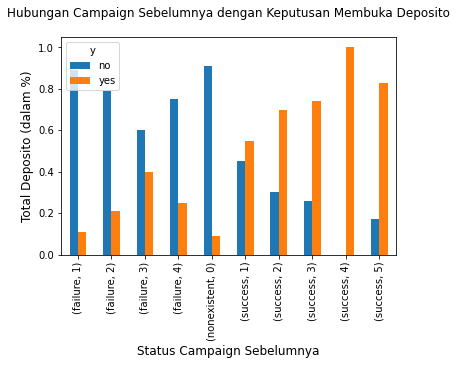

In [48]:
plt.figure(figsize=(20,10),dpi=150)
barplot7 = crosstb7.plot.bar(rot=1)
plt.title("Hubungan Campaign Sebelumnya dengan Keputusan Membuka Deposito",size=12,pad=20)
plt.xlabel("Status Campaign Sebelumnya",size=12)
plt.ylabel('Total Deposito (dalam %)',size=12)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.savefig('Visualisasi Business Question 7.jpeg')
plt.show()

## BUSINESS QUESTION 8
Apakah nasabah yang memiliki rumah dan tidak memiliki hutang akan mempengaruhi keputusan untuk membuka deposito ?

In [54]:
pd.crosstab(index=[df['housing'], df['loan']], columns=df['y'], margins=True)

y                no   yes    All
housing loan                    
no      no    12094  1387  13481
        yes    1952   220   2172
yes     no    14694  1806  16500
        yes    2918   335   3253
All           31658  3748  35406

In [55]:
# Hasil Tabular
crosstb9 = (pd.crosstab(index=[df['housing'], df['loan']], columns=df['y'], normalize='index')).round(2)
crosstb9

y               no   yes
housing loan            
no      no    0.90  0.10
        yes   0.90  0.10
yes     no    0.89  0.11
        yes   0.90  0.10

<Figure size 3000x1500 with 0 Axes>

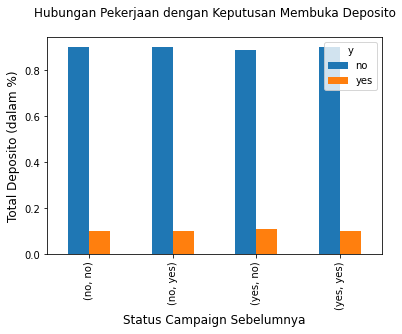

In [56]:
plt.figure(figsize=(20,10),dpi=150)
barplot9 = crosstb9.plot.bar(rot=1)
plt.title("Hubungan Pekerjaan dengan Keputusan Membuka Deposito",size=12,pad=20)
plt.xlabel("Status Campaign Sebelumnya",size=12)
plt.ylabel('Total Deposito (dalam %)',size=12)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.show()